In [1]:
from google.colab import files
upload=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data file

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Look at the top 5 records of data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
#Checking the datatype 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%,50%,75% distribution is not proper.
75% customers have tenure less than 55 months.
Average MonthlyCharges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month.

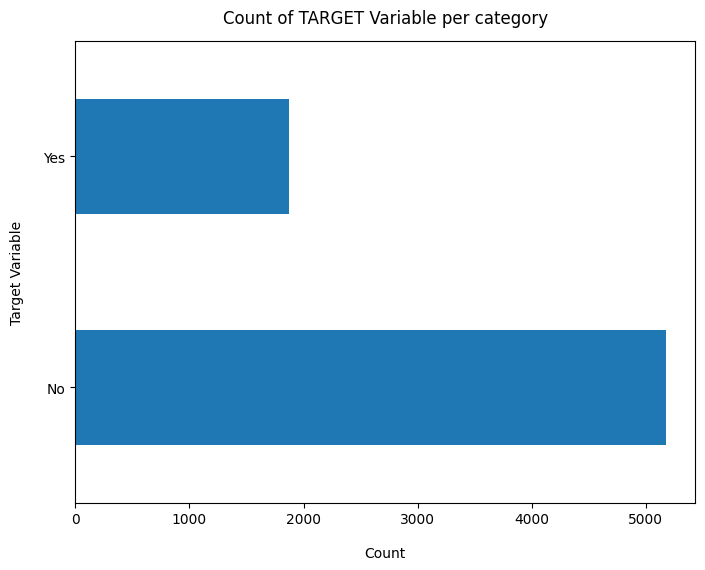

In [9]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [10]:
(df['Churn'].value_counts()/len(df['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio =73:27
* So we analyse the data with other features while taking the target values separately to get some insights.

In [12]:
#Summary of the dataframe... As we have too many columns,we are using the verbose=True mode
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#Checking missing values
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# Data Cleaning

Create a copy of base data for manipulation & processing

In [14]:
df1=df.copy()

1.Total charges should be numeric amount. Let's convert it to numerical data type

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges,errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

2.We can see there are 11 missing values in TotalCharges column. Let's check these records.

In [16]:
df1.loc[df1['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**3. Missing value Treatment**

Since the percentage of these records to total dataset is very low.ie.0.15% , it is safe to ignore them from further processing.

In [17]:
#Removing missing values
df1.dropna(how='any',inplace=True)

**4. Divide customers into bins based on tenure eg. for tenure < 12 months : assign a tenure group of 1-12 ,for tenure between 1 to 2 yrs , tenure group of 13-24; so on...  **

In [18]:
#Get the max tenure
df1['tenure'].max()

72

In [19]:
#Group the tenure in bins of 12 months
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
df1['tenure_group']=pd.cut(df1.tenure,range(1,80,12),right=False,labels=labels)

In [20]:
df1['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**5. Remove columns not required for processing**

In [21]:
#Drop column customerID and tenure
df1.drop(columns=['customerID','tenure'],axis=1,inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#  Data Exploration

1. Plot distribution of individual predictors by churn

**Univariate Analysis**

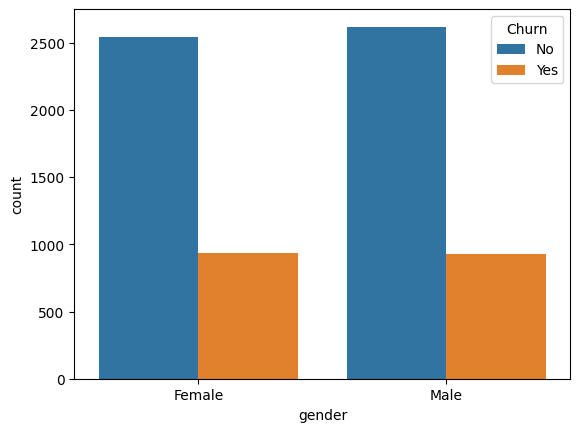

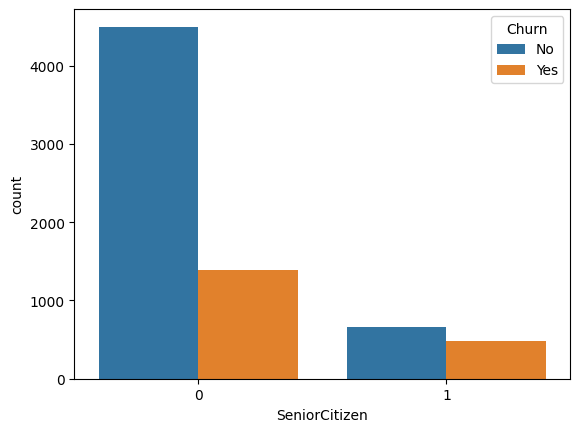

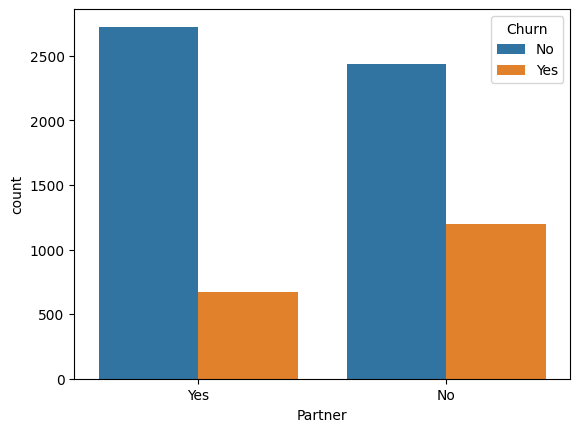

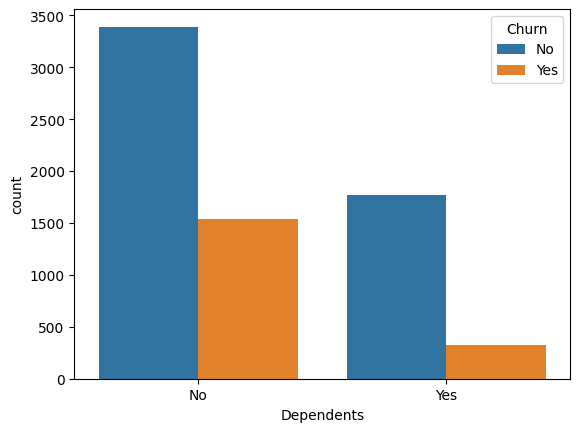

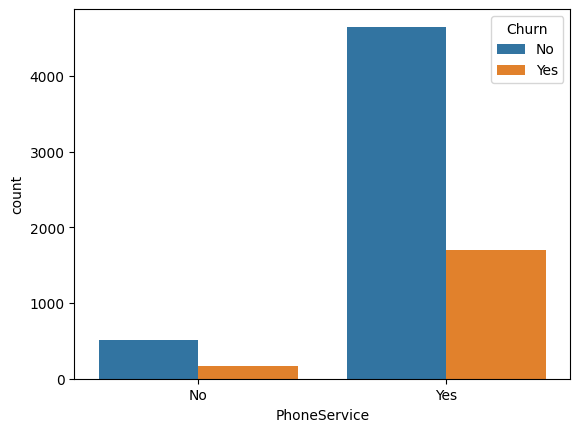

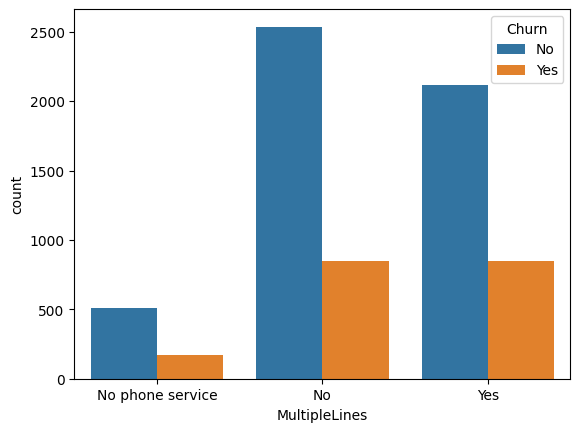

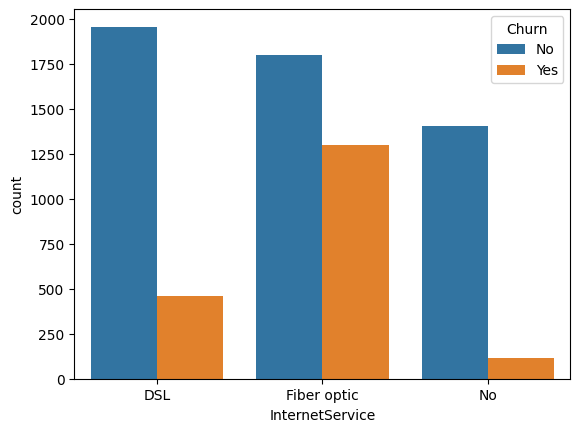

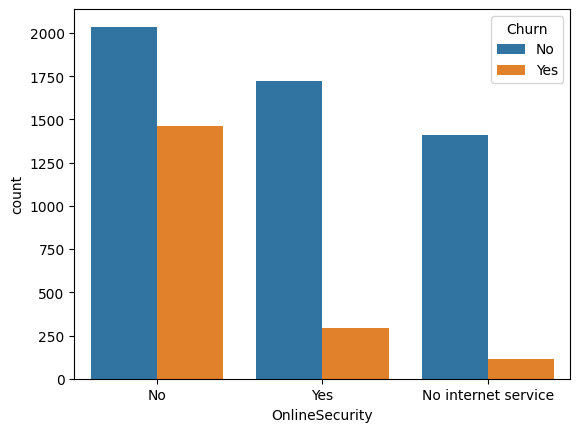

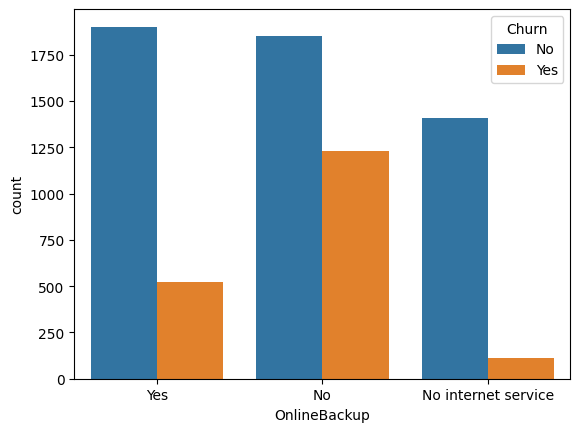

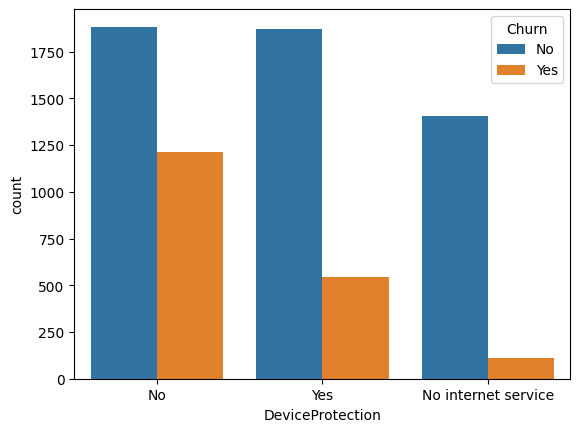

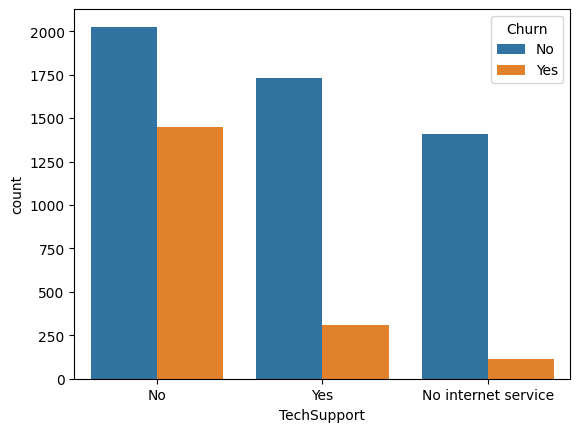

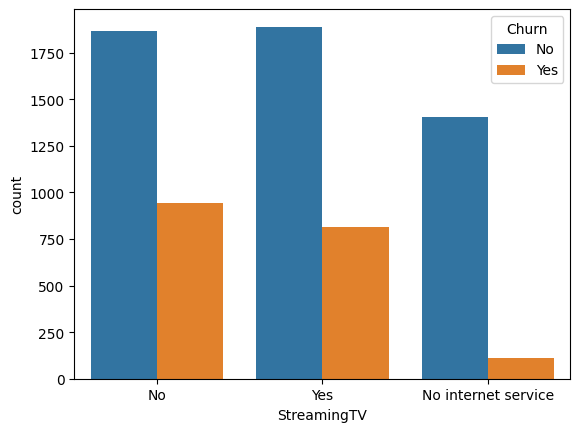

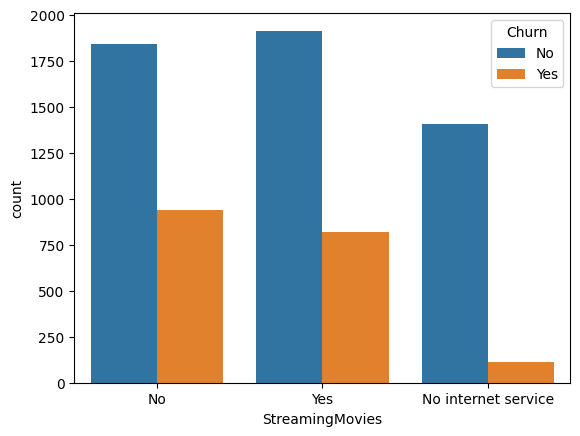

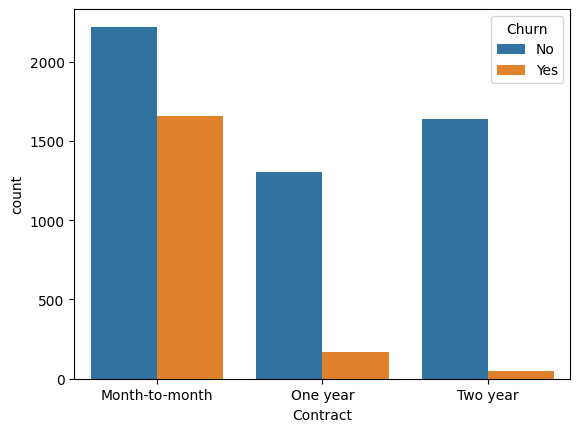

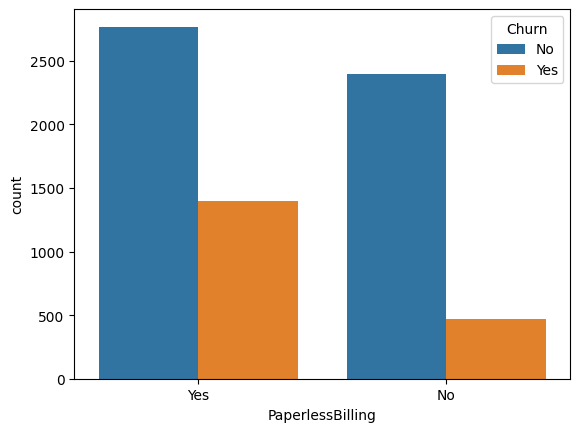

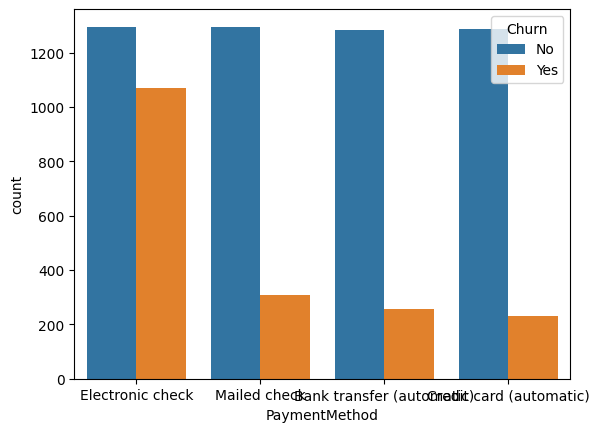

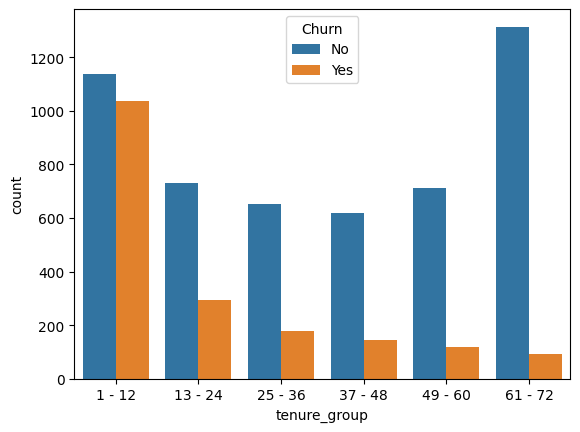

In [22]:
for i, predictor in enumerate(df1.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=df1,x=predictor,hue='Churn')

2. Convert the target variable 'Churn' in binary variable.ie.Yes=1, No=0

In [23]:
df1['Churn']=np.where(df1.Churn=='Yes',1,0)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3.Convert all the categorical variables into dummy variables

In [24]:
df1_dummies=pd.get_dummies(df1)
df1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


4. Relationship between MonthlyCharges and TotalCharges

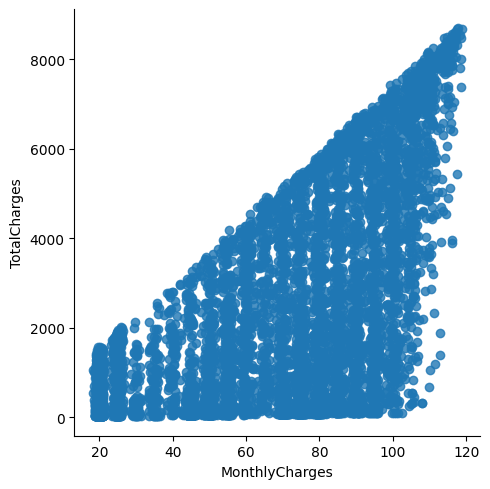

In [25]:
sns.lmplot(data=df1_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

TotalCharges increases as MonthlyCharges increases

5.Churn by MonthlyCharges and TotalCharges

<ipython-input-26-37904570f15d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies['Churn']==0) ],color="Red",shade=True)
<ipython-input-26-37904570f15d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies['Churn']==1)],ax=mth,color="Green",shade=True)


Text(0.5, 1.0, 'Monthly Charges by churn')

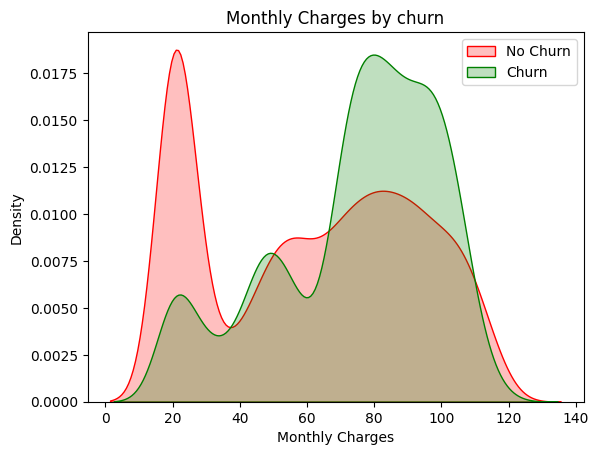

In [26]:
mth=sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies['Churn']==0) ],color="Red",shade=True)
mth=sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies['Churn']==1)],ax=mth,color="Green",shade=True)
mth.legend(["No Churn","Churn"],loc='upper right')
mth.set_ylabel("Density")
mth.set_xlabel("Monthly Charges")
mth.set_title("Monthly Charges by churn")

**Insight** : Churn is high when MonthlyCharges are high

<ipython-input-27-80378a822a90>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot=sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"]==0)],color="Red",shade=True)
<ipython-input-27-80378a822a90>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot=sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"]==1)],color='Green',shade=True)


Text(0.5, 1.0, 'Total Charges by Churn')

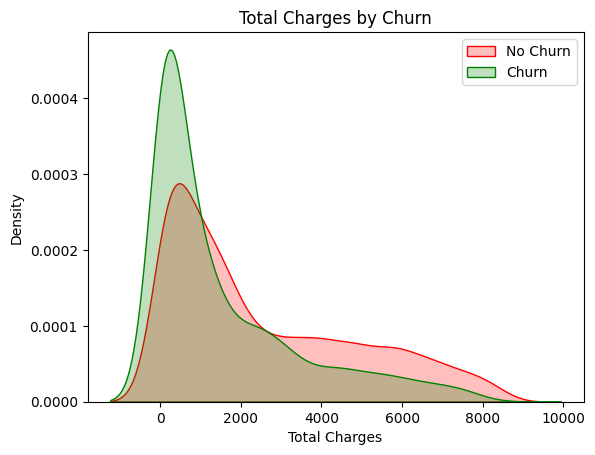

In [27]:
Tot=sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"]==0)],color="Red",shade=True)
Tot=sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"]==1)],color='Green',shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel("Density")
Tot.set_xlabel("Total Charges")
Tot.set_title("Total Charges by Churn")


**Insight** : As higher Churn at lower Total Charges

However if we combine the insights of 3 parameters ie.Tenure,MonthlyCharges & TotalCharges then the picture is bit clear:- Higher Monthly Charge at lower tenure results into lower TotalCharge. Hence,all these 3 factors viz **Higher Monthly Charge, Lower tenure** and **Lower Total charge** are linked to **High Churn**

6. Build a correlation of all predictors with 'Churn'

<Axes: >

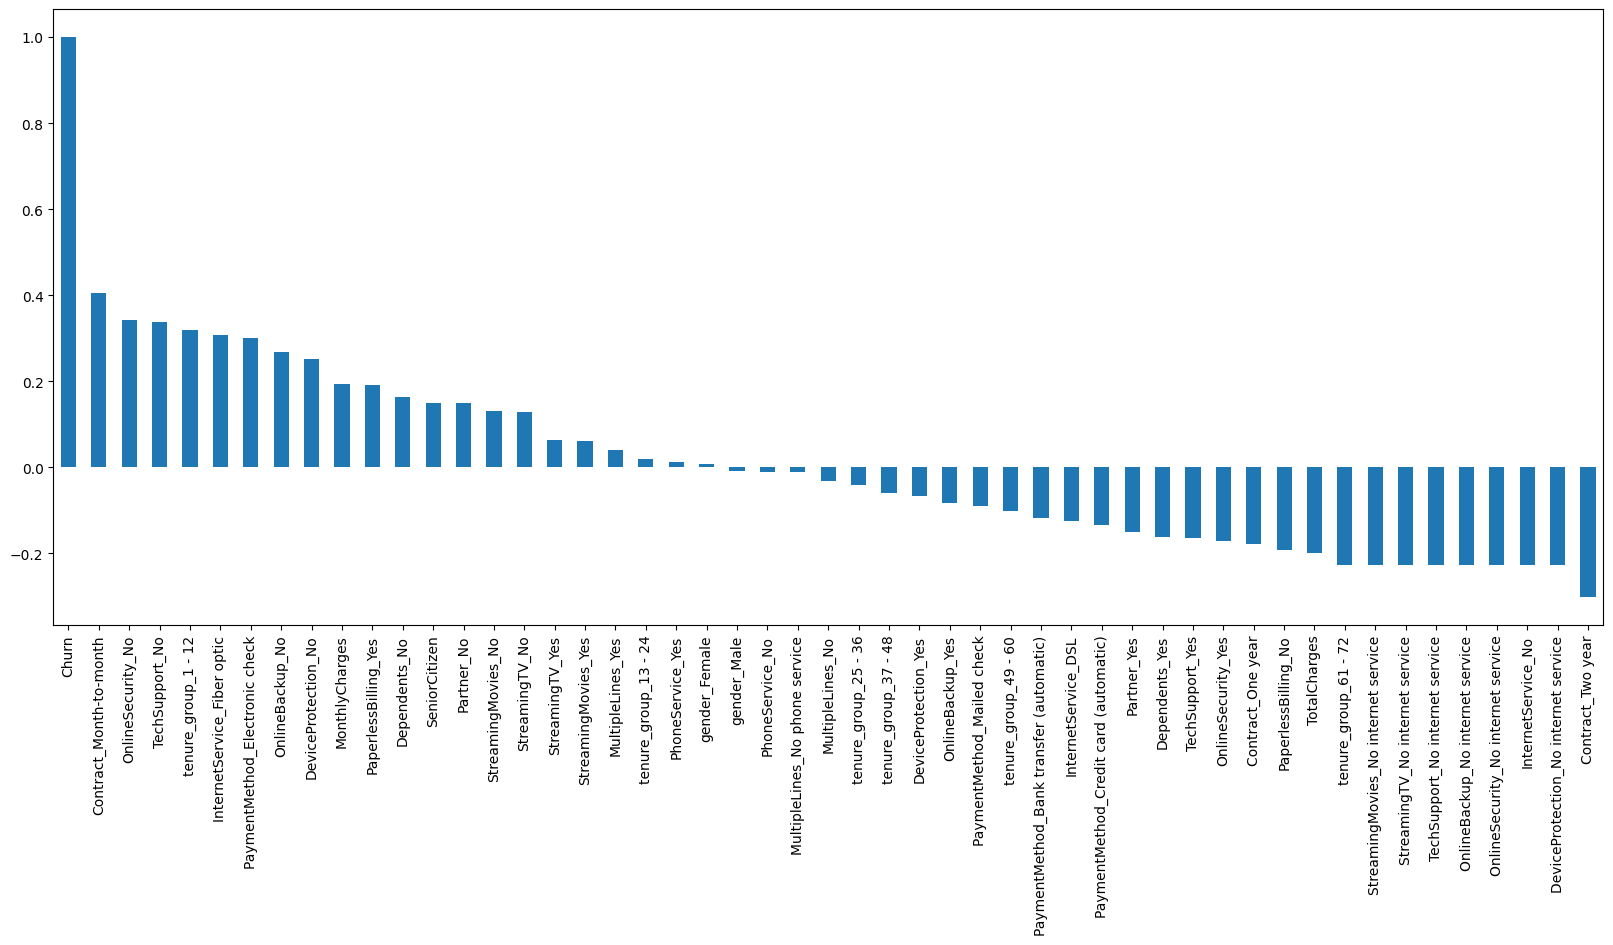

In [28]:
plt.figure(figsize=(20,8))
df1_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Insight **

**High** Churn seen in case of Month to month contracts,No online security,No Tech support,First year of subscription and Fibre optics Internet

**Low** Churn is seen in case of Long term contracts,Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender,Availability of PhoneService and of Multiple lines have almost no impact on Churn

This is also evident from the Heatmap below

<Axes: >

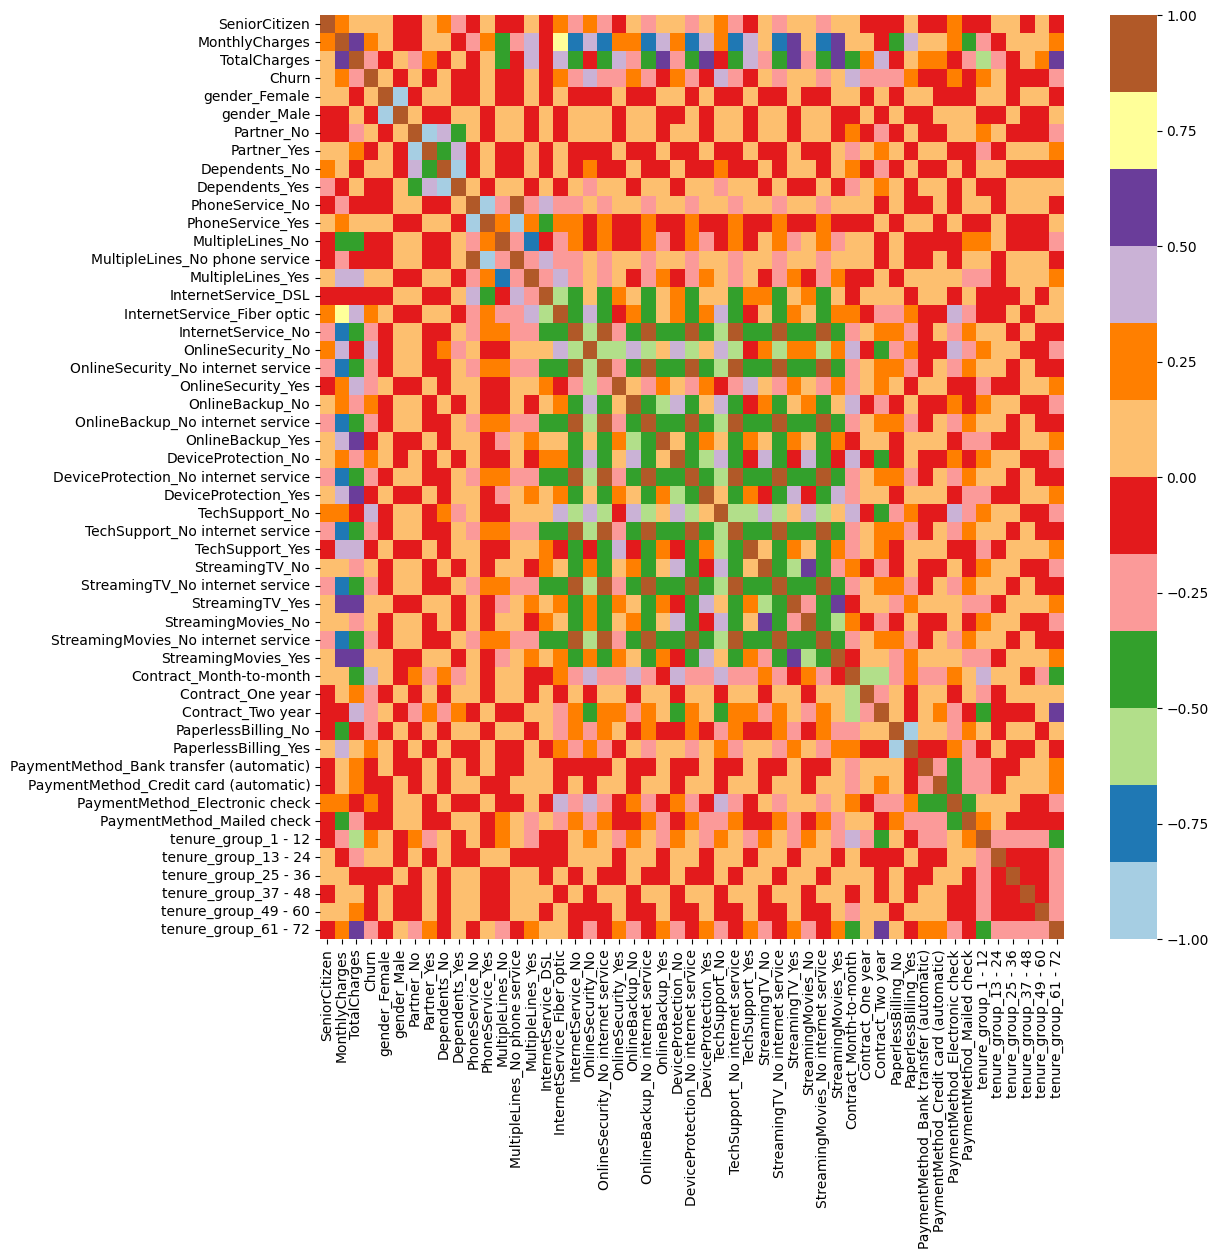

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_dummies.corr(),cmap="Paired")

**Bivariate Analysis**

In [30]:
new_df1_target0=df1.loc[df1["Churn"]==0]
new_df1_target1=df1.loc[df1["Churn"]==1]

In [31]:
def uniplot(df,col,title,hue=None):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"]=20
  plt.rcParams['axes.titlesize']=22
  plt.rcParams['axes.titlepad']=30

  temp=pd.Series(data=hue)
  fig,ax=plt.subplots()
  width=len(df[col].unique()) +7 + 4*len(temp.unique())
  fig.set_size_inches(width,8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')

  plt.show()

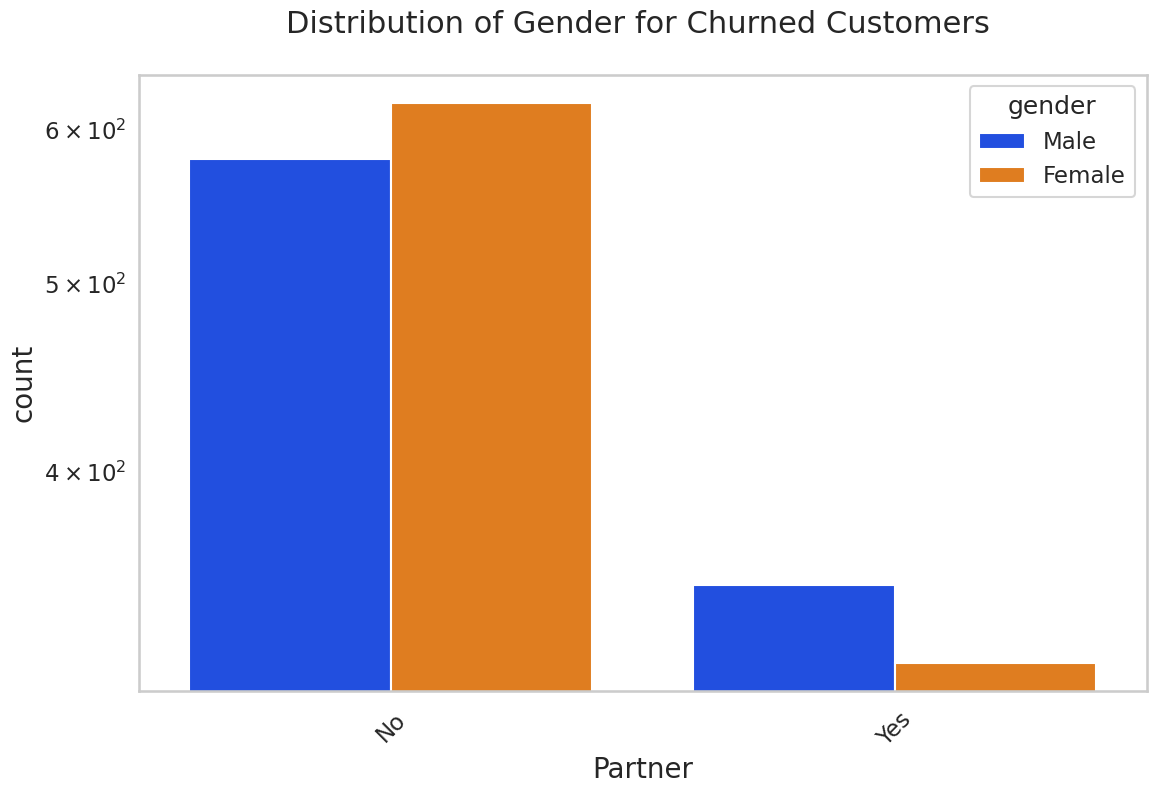

In [32]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers ',hue='gender')

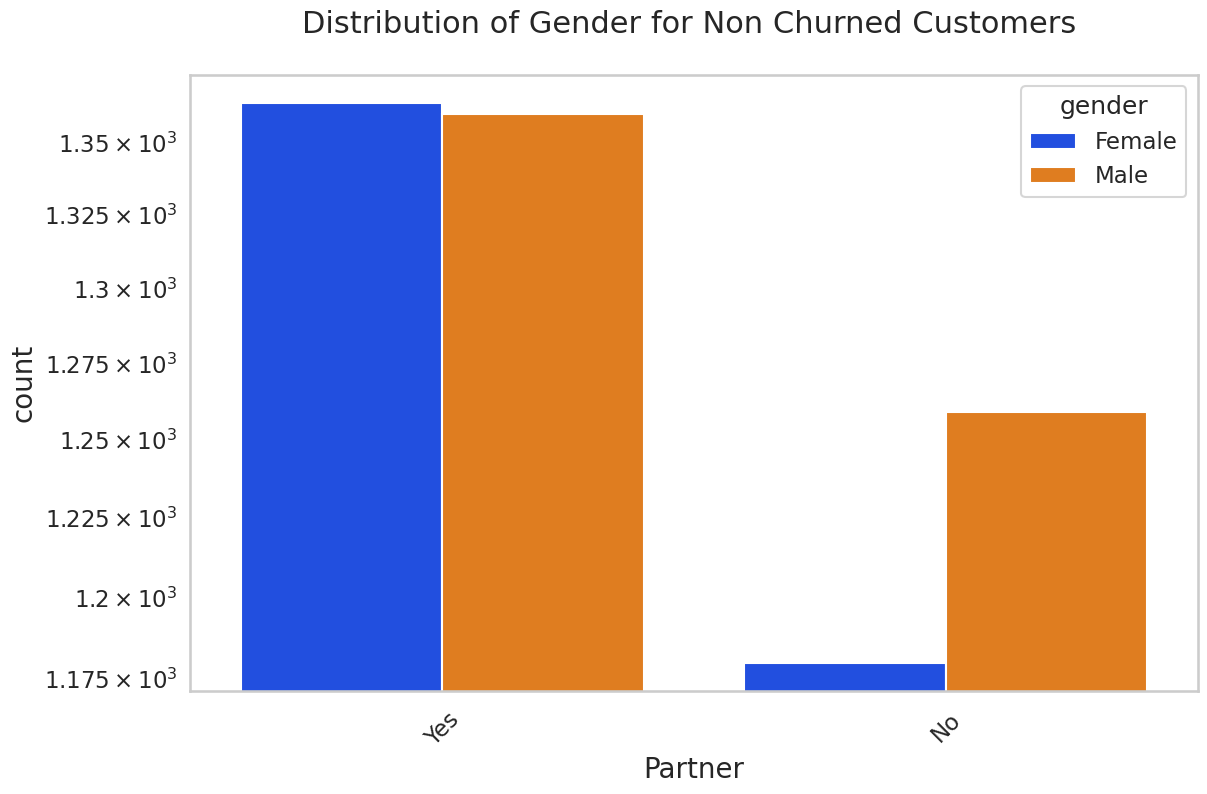

In [33]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers ',hue='gender')

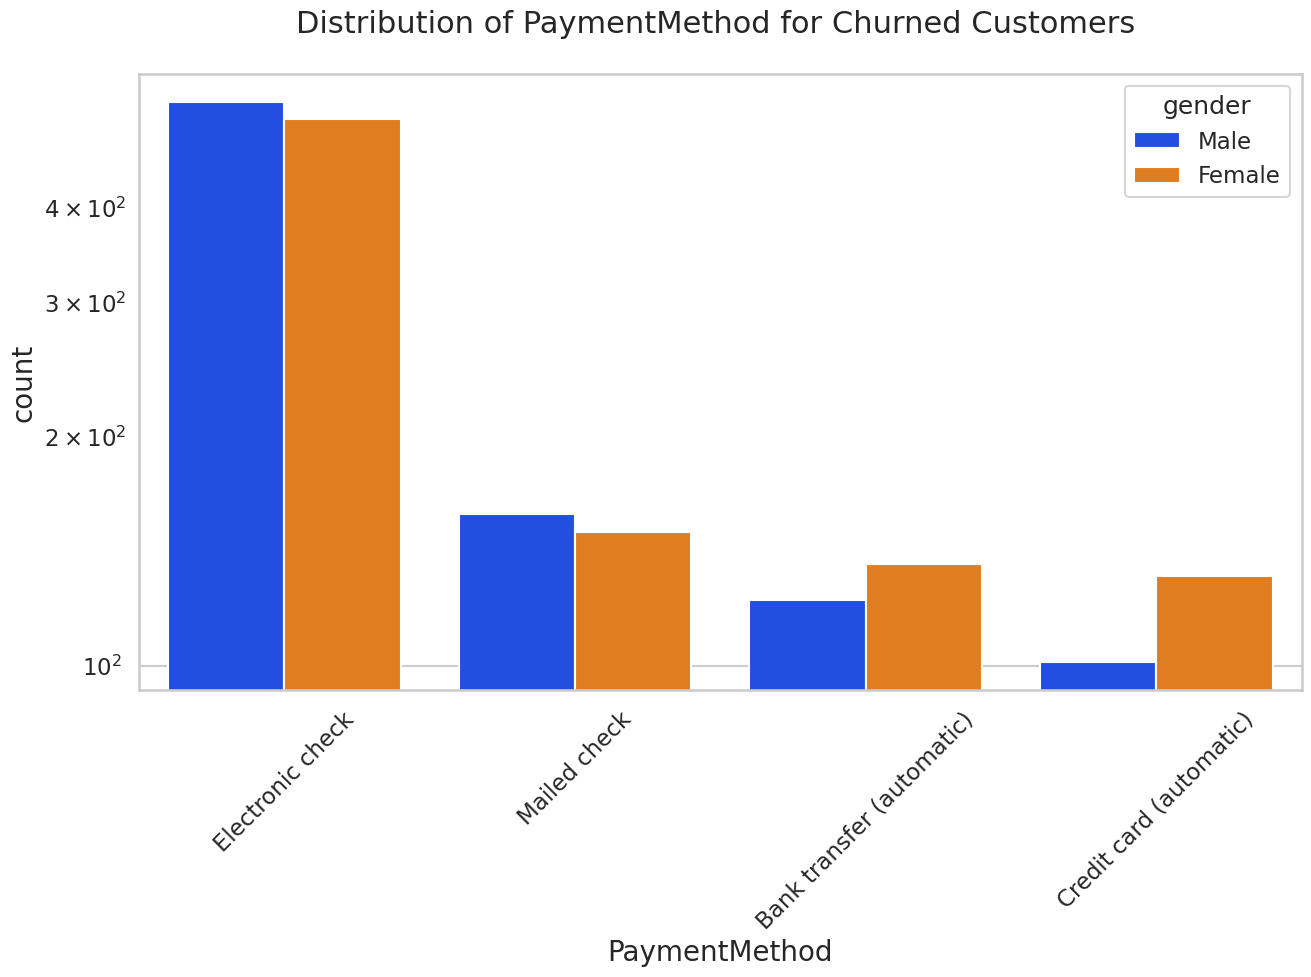

In [34]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers ',hue='gender')

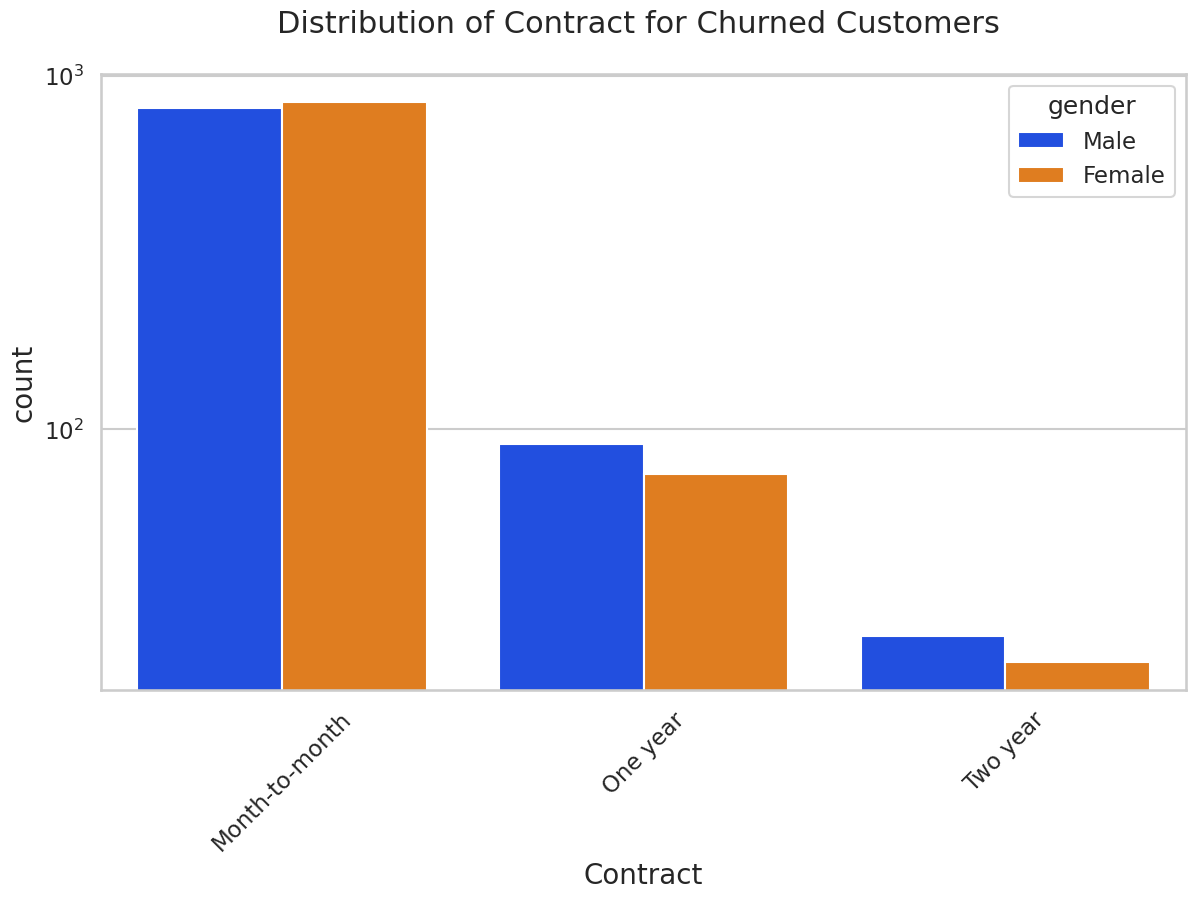

In [35]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers ',hue='gender')

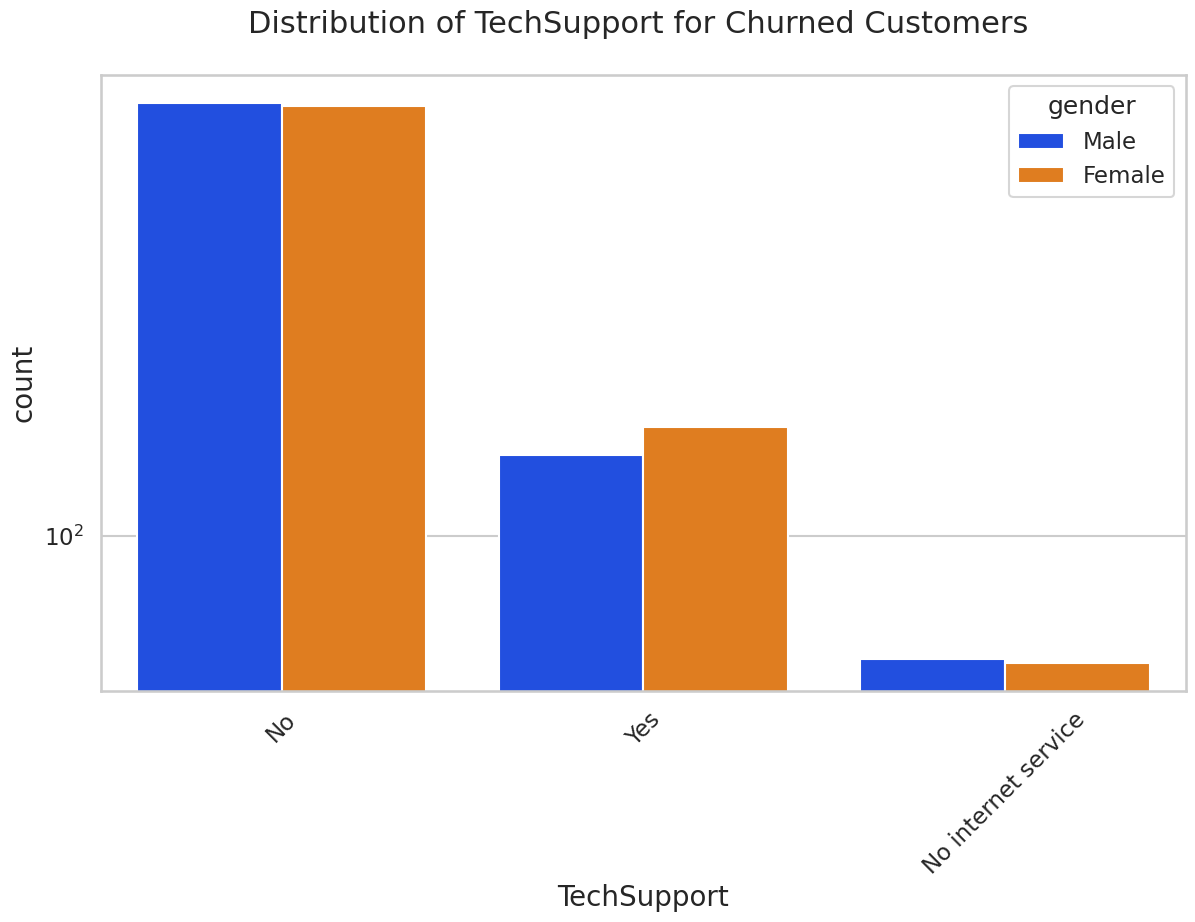

In [36]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers ',hue='gender')

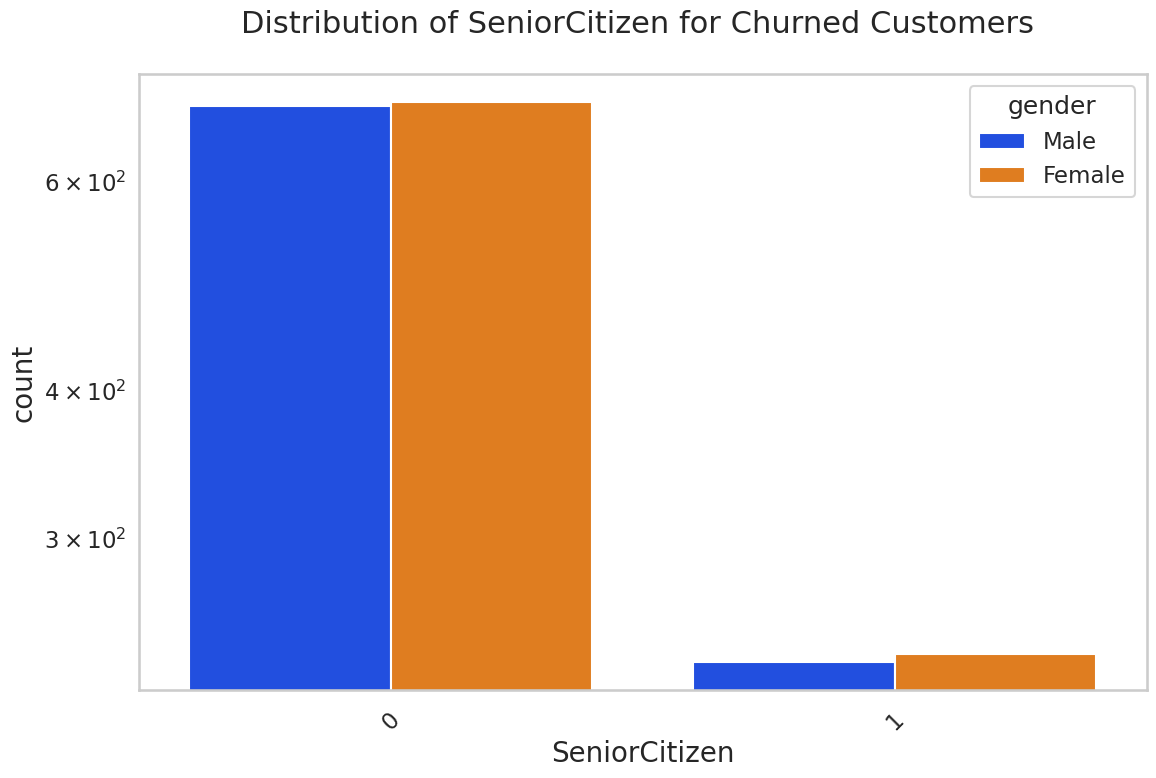

In [37]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers ',hue='gender')

**Insights**

1.Electronic check medium are the highest churners

2.Contract Type- Monthly customers are more likely to churn beacause of no contract terms, as they are free to go customers.

3.No online security,No tech support category are high churners

4.Non senior citizen are high churners